In [1]:
import os
import glob
import skimage
from skimage import filters as sk_filt
from skimage import feature as sk_feat
from skimage import img_as_ubyte
from skimage.io import imsave, imread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_dir = '../images/'
all_image_names = ['image_' + str(i) for i in range(118)]
ext_dict = {
    'og': 'original/',
    'all': 'all_edges/',
    '0': '0/',
    '30': '30/',
    '60': '60/',
    '90': '90/',
    '120': '120/',
    '150': '150/'
}
orientations = [0, 30, 60, 90, 120, 150]

In [3]:
for ext in ext_dict.values():
    if not os.path.exists(img_dir + ext):
        os.makedirs(img_dir + ext)

In [4]:
def get_paths(dir, image_type='png'):
    """
    get the file name/path of all the files within a folder.
        e.g. glob.glob("/home/adam/*/*.txt").
    Use glob.escape to escape strings that are not meant to be patterns
        glob.glob(glob.escape(directory_name) + "/*.txt")
    """
    end = "/*." + image_type
    file_paths = glob.glob(glob.escape(dir) + end)
    return file_paths

In [5]:
# # Setting left_is_zero to false because the experiment's 0 degree starts at vertical
# def angle(dx, dy, vert_is_zero=True, as_degree=True):
#     a = np.mod(np.arctan2(dy, dx), 2*np.pi)
#     if vert_is_zero:
#         a = np.pi/2 - a
#     if as_degree:
#         a = a * 180 / np.pi
#     return a

In [6]:
# def get_image_angle(
#     file,
#     guass_sigma = 25, # for blurring
#     guass_truncate = 1/5, # for blurring
#     canny_sigma = 1, # for edge 
#     grad_fns='farid', # e.g. 'sobel','scharr', 'prewitt'
#     angle_vert_is_zero = True, # zero degrees is y axis
#     angle_as_degree = True, # convert radian to degree, required for now
#     angle_set = [0, 30, 60, 90, 120, 150], # in degrees for now
#     angle_fudge = 15 # fudge angle to compare with set
# ):
#     assert angle_as_degree, 'Only allow "angle_as_degree=True" at the moment'
    
#     img = skimage.io.imread(file)
#     blur = sk_filt.gaussian(img, sigma=guass_sigma, truncate=guass_truncate)
#     edges = skimage.feature.canny(blur, sigma=canny_sigma)
    
#     params = dict(
#         guass_sigma = guass_sigma,
#         guass_truncate = guass_truncate,
#         canny_sigma = canny_sigma,
#         grad_fns = grad_fns,
#         angle_vert_is_zero = angle_vert_is_zero,
#         angle_as_degree = angle_as_degree,
#         angle_set = angle_set,
#         angle_fudge = angle_fudge,
#     )
    
#     output = dict(
#         file = file,
#         params = params,
#         preproc = dict(
#             orig = img,
#             blur = blur,
#             edges = edges,
#         ),
#         angles = dict(),
#     )

#     mask_edge = sk_filt.gaussian(edges, sigma=guass_sigma*2, truncate=guass_truncate) > 0
    
#     if isinstance(grad_fns, str):
#         grad_fns = [grad_fns]
    
#     for grad_fn in grad_fns:
#         dx_fn = getattr(sk_filt, grad_fn + '_h') # e.g. 'skimage.filters.farid_h'
#         dy_fn = getattr(sk_filt, grad_fn + '_v') # e.g. 'skimage.filters.farid_v'

#         angles = angle(
#             dx = dx_fn(edges),
#             dy = dy_fn(edges),
#             vert_is_zero = angle_vert_is_zero,
#             as_degree = angle_as_degree,
#         )
        
#         angles_dict = dict(
#             angles = angles
#         )
        
#         angles_dict.update({
#             a: np.abs(angles - a) <= angle_fudge
#             for a in angle_set
#         })
        
#         output['angles'][grad_fn] = angles_dict
        
#     return output

In [7]:
def angle(dx, dy, left_is_zero=True, as_degree=True):
    a = np.mod(np.arctan2(dy, dx), 2*np.pi)
    
    if left_is_zero:
        a = np.pi - a
        
    if as_degree:
        a = a * 180 / np.pi
        
    return a
    
def get_image_angle(
    file,
    guass_sigma = 25, # for blurring
    guass_truncate = 1/5, # for blurring
    canny_sigma = 1, # for edge 
    grad_fns='farid', # e.g. 'sobel','scharr', 'prewitt'
    angle_left_is_zero = True, # zero degrees is on left
    angle_as_degree = True, # convert radian to degree, required for now
    angle_set = [0, 30, 60, 90, 120, 150], # in degrees for now
    angle_fudge = 15 # fudge angle to compare with set
):
    assert angle_as_degree, 'Only allow "angle_as_degree=True" at the moment'
    
    img = skimage.io.imread(file)
    blur = sk_filt.gaussian(img, sigma=guass_sigma, truncate=guass_truncate)
    edges = skimage.feature.canny(blur, sigma=canny_sigma)
    
    params = dict(
        guass_sigma = guass_sigma,
        guass_truncate = guass_truncate,
        canny_sigma = canny_sigma,
        grad_fns = grad_fns,
        angle_left_is_zero = angle_left_is_zero,
        angle_as_degree = angle_as_degree,
        angle_set = angle_set,
        angle_fudge = angle_fudge,
    )
    
    output = dict(
        file = file,
        params = params,
        preproc = dict(
            orig = img,
            blur = blur,
            edges = edges,
        ),
        angles = dict(),
    )

    mask_edge = sk_filt.gaussian(edges, sigma=guass_sigma*2, truncate=guass_truncate) > 0
    
    if isinstance(grad_fns, str):
        grad_fns = [grad_fns]
    
    for grad_fn in grad_fns:
        dx_fn = getattr(sk_filt, grad_fn + '_h') # e.g. 'skimage.filters.farid_h'
        dy_fn = getattr(sk_filt, grad_fn + '_v') # e.g. 'skimage.filters.farid_v'

        angles = angle(
            dx = dx_fn(edges),
            dy = dy_fn(edges),
            left_is_zero = angle_left_is_zero,
            as_degree = angle_as_degree,
        )
        
        angles_dict = dict(
            angles = angles
        )
        
        angles_dict.update({
            a: np.abs(angles - a) <= angle_fudge
            for a in angle_set
        })
        
        output['angles'][grad_fn] = angles_dict
        
    return output
        


In [8]:
results = []
edge_scores_normalized_by_all = {}
edge_scores_normalized_by_sum = {}

In [9]:
originals = get_paths(img_dir + ext_dict['og'])

In [10]:
for file in originals:
    results.append(get_image_angle(
        file = file,
        grad_fns='farid' # farid seems sufficient
    ))

In [11]:
# result = results[0]
# file = result['file']
# save_img_name = file.split('/')[-1]
# # Get all edges
# all_edges = result['preproc']['edges']
# # Total edges score, two ways
# all_edges_score = np.mean(all_edges)
# sum_edges_score = 0
# # Populate norm by all dict
# for o in orientations:
#     filtered_edges = result['angles']['farid'][o]
#     filtered_edge_score = np.mean(filtered_edges)
#     sum_edges_score += filtered_edge_score
#     filtered_edge_score_normalized_by_all = filtered_edge_score / all_edges_score
# # Populate norm by sum dict
# for o in orientations:
#     filtered_edges = result['angles']['farid'][o]
#     filtered_edge_score = np.mean(filtered_edges)
#     filtered_edge_score_normalized_by_sum = filtered_edge_score / sum_edges_score

In [12]:
for i in range(len(originals)):
    result = results[i]
    file = result['file']
    save_img_name = file.split('/')[-1]
    # Get all edges
    all_edges = result['preproc']['edges']
    # Sum pixels to get total edge score
    all_edges_score = np.mean(all_edges)
    sum_edges_score = 0
    # Save result image containing all edges
    imsave(os.path.join(img_dir, ext_dict['all'] + save_img_name), img_as_ubyte(all_edges), check_contrast=False)
    # Initialize dicts for each image
    edge_scores_normalized_by_all[save_img_name] = {}
    edge_scores_normalized_by_sum[save_img_name] = {}
    # For each angle...
    for o in orientations:
        # Save result image containing only edges in this angle
        filtered_edges = result['angles']['farid'][o]
        imsave(os.path.join(img_dir, ext_dict[str(o)] + save_img_name), img_as_ubyte(filtered_edges), check_contrast=False)
        filtered_edge_score = np.mean(filtered_edges)
        sum_edges_score += filtered_edge_score
        filtered_edge_score_normalized_by_all = filtered_edge_score / all_edges_score
        edge_scores_normalized_by_all[save_img_name][o] = filtered_edge_score_normalized_by_all
    for o in orientations:
        filtered_edges = result['angles']['farid'][o]
        filtered_edge_score = np.mean(filtered_edges)
        # if i == 0:
        #     print(o)
        #     print(filtered_edge_score)
        #     print(sum_edges_score)
        filtered_edge_score_normalized_by_sum = filtered_edge_score / sum_edges_score
        edge_scores_normalized_by_sum[save_img_name][o] = filtered_edge_score_normalized_by_sum

In [13]:
edge_scores_normalized_by_all['image_44.png']

{0: 0.4305568597990421,
 30: 0.45581744764766646,
 60: 0.5069959620621655,
 90: 0.46201521269602774,
 120: 0.7162174852098788,
 150: 0.5780824490562494}

In [14]:
edge_scores_normalized_by_sum['image_44.png']

{0: 0.13669836916013237,
 30: 0.14471840434095587,
 60: 0.16096717450284728,
 90: 0.1466861453146895,
 120: 0.2273933394949465,
 150: 0.18353656718642858}

In [15]:
total = 0
for o in orientations:
    total += edge_scores_normalized_by_sum['image_44.png'][o]
total

1.0000000000000002

In [16]:
df_edge_scores_normalized_by_all = pd.DataFrame(edge_scores_normalized_by_all)
df_edge_scores_normalized_by_all = df_edge_scores_normalized_by_all.transpose()
df_edge_scores_normalized_by_all.columns = orientations
# add a row for the average of each column
df_edge_scores_normalized_by_all.loc['mean'] = df_edge_scores_normalized_by_all.mean()
df_edge_scores_normalized_by_all.loc['variance'] = df_edge_scores_normalized_by_all.var()
df_edge_scores_normalized_by_all

0         30        60        90        120       150
image_15.png  0.590312  0.587495  0.519373  0.370002  0.482336  0.545180
image_29.png  0.408528  0.486447  0.528013  0.621353  0.505159  0.459377
image_28.png  0.579932  0.515361  0.443109  0.361648  0.551842  0.633338
image_14.png  0.469435  0.486115  0.484907  0.550642  0.517760  0.506023
image_16.png  0.530834  0.575504  0.533941  0.454225  0.454892  0.474635
...                ...       ...       ...       ...       ...       ...
image_30.png  0.981866  0.407770  0.317208  0.301012  0.349817  0.386838
image_24.png  0.581225  0.576744  0.500677  0.365816  0.483918  0.568668
image_18.png  0.710755  0.486024  0.376990  0.423269  0.397631  0.378934
mean          0.482878  0.506650  0.502146  0.507138  0.526068  0.515054
variance      0.035721  0.023725  0.015706  0.048012  0.024635  0.021220

[120 rows x 6 columns]

In [17]:
df_edge_scores_normalized_by_sum = pd.DataFrame(edge_scores_normalized_by_sum)
df_edge_scores_normalized_by_sum = df_edge_scores_normalized_by_sum.transpose()
df_edge_scores_normalized_by_sum.columns = orientations
# add a row for the average of each column
df_edge_scores_normalized_by_sum.loc['mean'] = df_edge_scores_normalized_by_sum.mean()
df_edge_scores_normalized_by_sum.loc['variance'] = df_edge_scores_normalized_by_sum.var()
df_edge_scores_normalized_by_sum

0         30        60        90        120       150
image_15.png  0.190750  0.189839  0.167827  0.119560  0.155859  0.176166
image_29.png  0.135774  0.161671  0.175485  0.206507  0.167890  0.152674
image_28.png  0.187970  0.167041  0.143623  0.117219  0.178866  0.205281
image_14.png  0.155706  0.161238  0.160838  0.182641  0.171735  0.167842
image_16.png  0.175539  0.190310  0.176566  0.150205  0.150426  0.156954
...                ...       ...       ...       ...       ...       ...
image_30.png  0.357756  0.148577  0.115579  0.109678  0.127461  0.140950
image_24.png  0.188890  0.187434  0.162713  0.118885  0.157267  0.184810
image_18.png  0.256257  0.175232  0.135921  0.152606  0.143362  0.136622
mean          0.160718  0.165501  0.164327  0.169682  0.171711  0.168062
variance      0.005073  0.002033  0.001353  0.007079  0.001993  0.001673

[120 rows x 6 columns]

In [27]:
# save df_edge_scores_normalized_by_sum to csv
df_edge_scores_normalized_by_sum.to_csv(
    '../data/edge_scores_normalized_by_sum.csv')

In [18]:
# Experiment Id	511510695	Cell Id	517503450
# 90 degrees
subset_results = []
for r in results:
    if ('image_106.png' in r['file'] or 'image_114.png' in r['file']):
        subset_results.append(r)

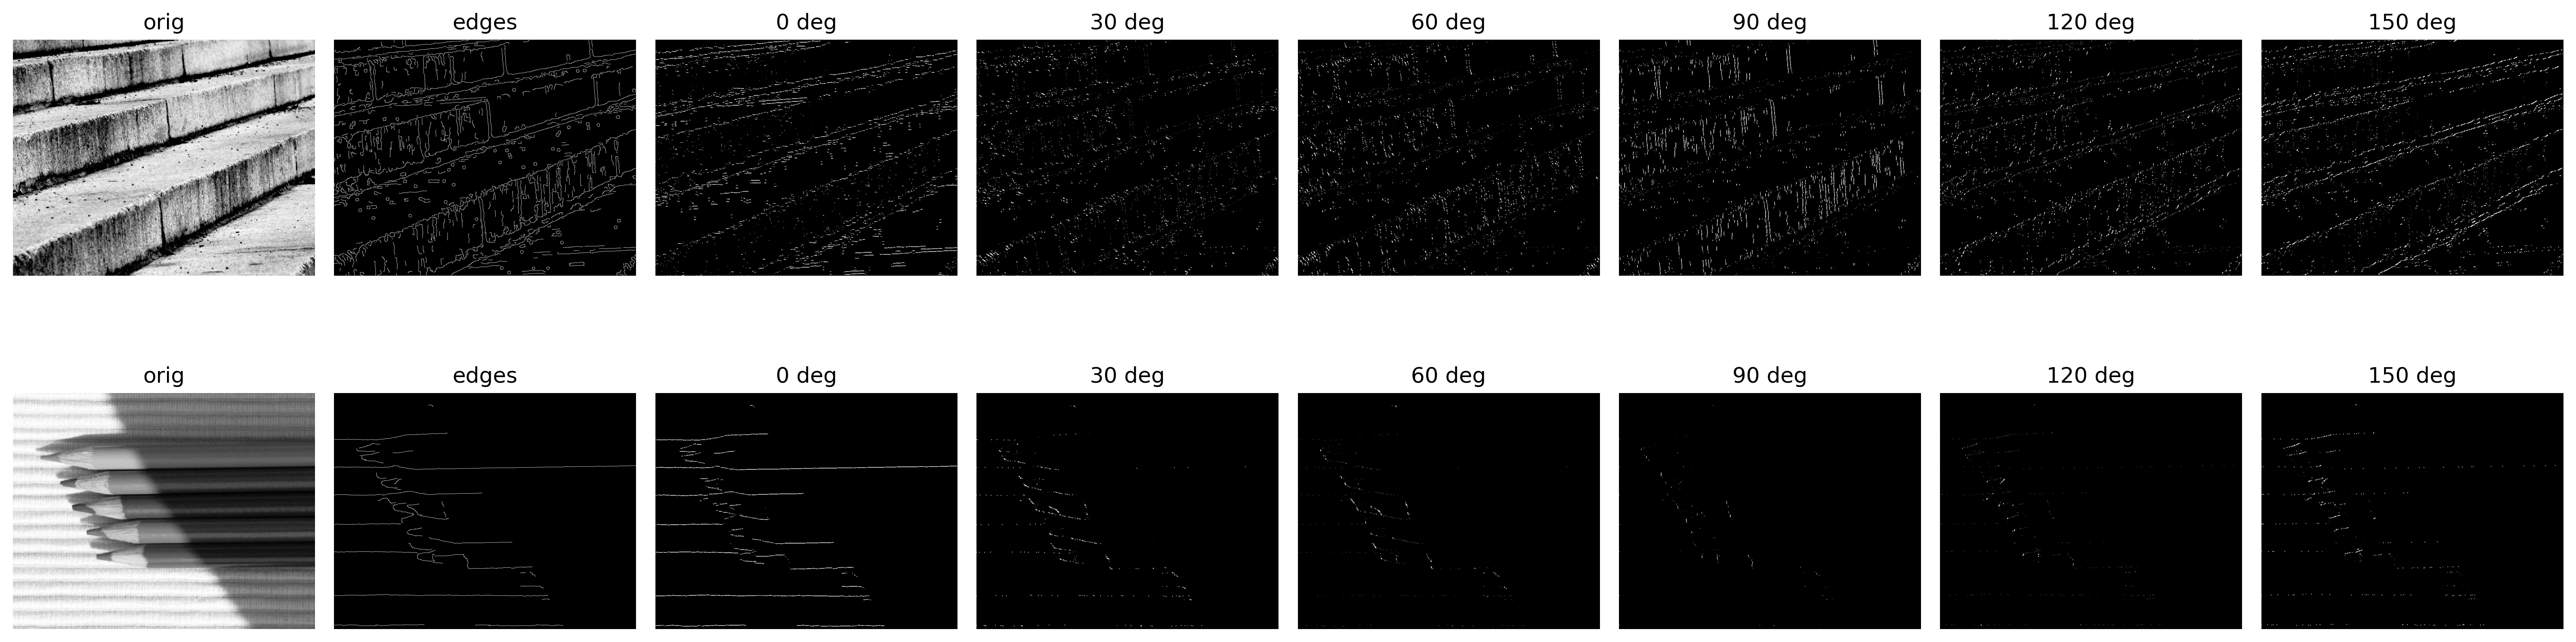

In [19]:
num_rows = len(subset_results)
num_cols = len(list(subset_results[0]['angles'].values())[0]) + 1

fig, axs = plt.subplots(
    num_rows, num_cols,
    figsize=(20,8), 
    sharex=True, sharey=True, 
    layout='tight',
    dpi=300
)
grad_fn_name = 'farid'
for row_idx, result in enumerate(subset_results):
    ax = axs[row_idx, 0]
    ax.imshow(result['preproc']['orig'], cmap='Greys_r')
    ax.set_title('orig')
    ax.set_axis_off()
    
    ax = axs[row_idx, 1]
    ax.imshow(result['preproc']['edges'], cmap='Greys_r')
    ax.set_title('edges')
    ax.set_axis_off()
    
    for pre_col_idx, (ttl, img) in enumerate(result['angles'][grad_fn_name].items()):
        if ttl == 'angles':
            continue
            
        ax = axs[row_idx, pre_col_idx + 1]
        img_obj = ax.imshow(img, cmap='Greys_r')
        ax.set_title(f'{ttl} deg')
        ax.set_axis_off()

In [20]:
subset_df = df_edge_scores_normalized_by_sum.loc[['image_106.png', 'image_114.png']]
subset_df.loc['mean'] = subset_df.mean()
subset_df.loc['variance'] = subset_df.var()
subset_df

0         30        60        90        120       150
image_106.png  0.215895  0.121774  0.134096  0.192597  0.143866  0.191772
image_114.png  0.604977  0.126890  0.068548  0.025869  0.050756  0.122960
mean           0.410436  0.124332  0.101322  0.109233  0.097311  0.157366
variance       0.037846  0.000007  0.001074  0.006950  0.002167  0.001184

In [21]:
# Experiment Id	511510917	Cell Id	517442396
# 60 degrees
subset_results_2 = []
for r in results:
    if ('image_28.png' in r['file'] or 'image_86.png' in r['file']):
        subset_results_2.append(r)

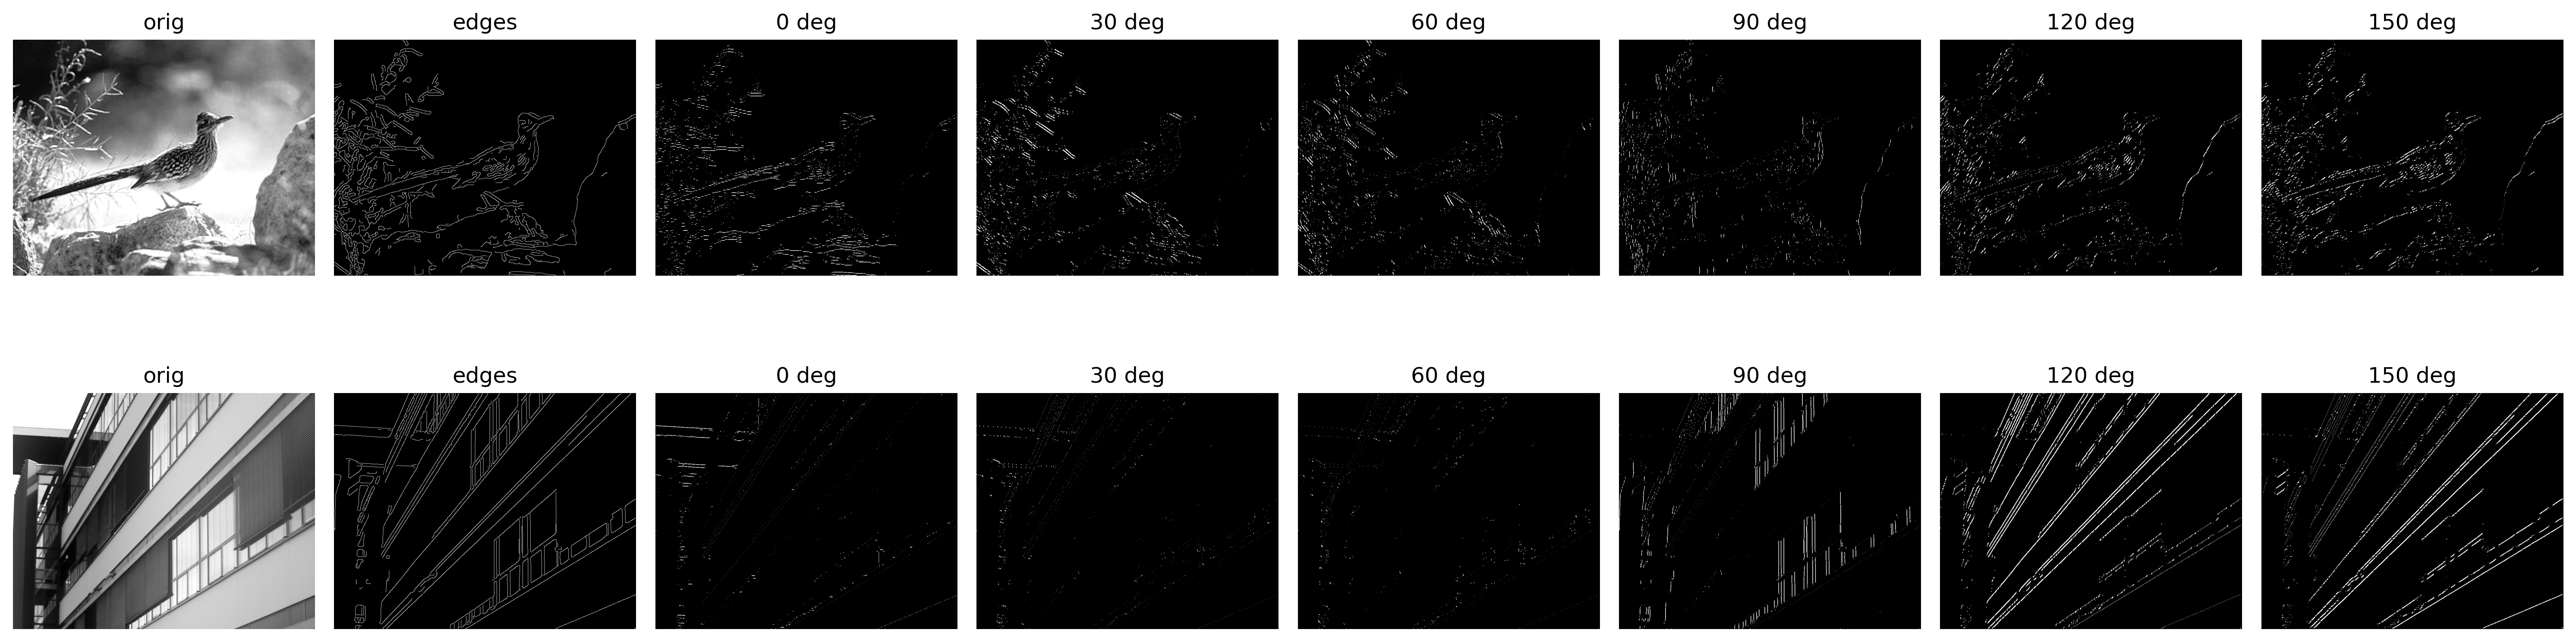

In [22]:
num_rows = len(subset_results_2)
num_cols = len(list(subset_results_2[0]['angles'].values())[0]) + 1

fig, axs = plt.subplots(
    num_rows, num_cols,
    figsize=(20,8), 
    sharex=True, sharey=True, 
    layout='tight',
    dpi=300
)
grad_fn_name = 'farid'
for row_idx, result in enumerate(subset_results_2):
    ax = axs[row_idx, 0]
    ax.imshow(result['preproc']['orig'], cmap='Greys_r')
    ax.set_title('orig')
    ax.set_axis_off()
    
    ax = axs[row_idx, 1]
    ax.imshow(result['preproc']['edges'], cmap='Greys_r')
    ax.set_title('edges')
    ax.set_axis_off()
    
    for pre_col_idx, (ttl, img) in enumerate(result['angles'][grad_fn_name].items()):
        if ttl == 'angles':
            continue
            
        ax = axs[row_idx, pre_col_idx + 1]
        img_obj = ax.imshow(img, cmap='Greys_r')
        ax.set_title(f'{ttl} deg')
        ax.set_axis_off()

In [23]:
subset_df_2 = df_edge_scores_normalized_by_sum.loc[['image_28.png', 'image_86.png']]
subset_df_2.loc['mean'] = subset_df_2.mean()
subset_df_2.loc['variance'] = subset_df_2.var()
subset_df_2

0         30        60        90        120       150
image_28.png  0.187970  0.167041  0.143623  0.117219  0.178866  0.205281
image_86.png  0.048263  0.031102  0.024522  0.165827  0.416371  0.313915
mean          0.118116  0.099072  0.084072  0.141523  0.297618  0.259598
variance      0.004880  0.004620  0.003546  0.000591  0.014102  0.002950